In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r"twitter_training.csv")
train_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
validation_data=pd.read_csv(r"twitter_validation.csv")
validation_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
missing_train = train_data.isnull().sum()
missing_validation = validation_data.isnull().sum()

In [5]:
# Check for duplicate rows
duplicates_train = train_data.duplicated().sum()
duplicates_validation = validation_data.duplicated().sum()

missing_train, missing_validation, duplicates_train, duplicates_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [6]:
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:, 2].value_counts()
unique_entities_train = train_data.iloc[:, 1].nunique()

train_sentiment_distribution, validation_sentiment_distribution, unique_entities_train

(Positive
 Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32)

In [7]:
train_data_cleaned = train_data.drop_duplicates()

In [9]:
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    326
 dtype: int64)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

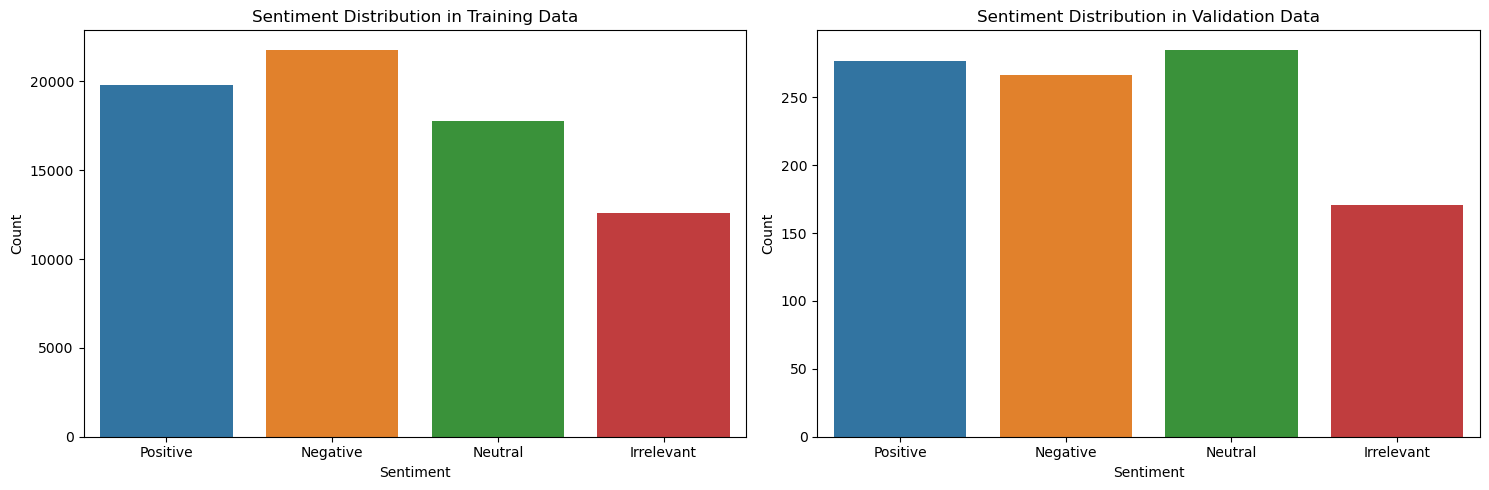

In [11]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=validation_data, x=validation_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

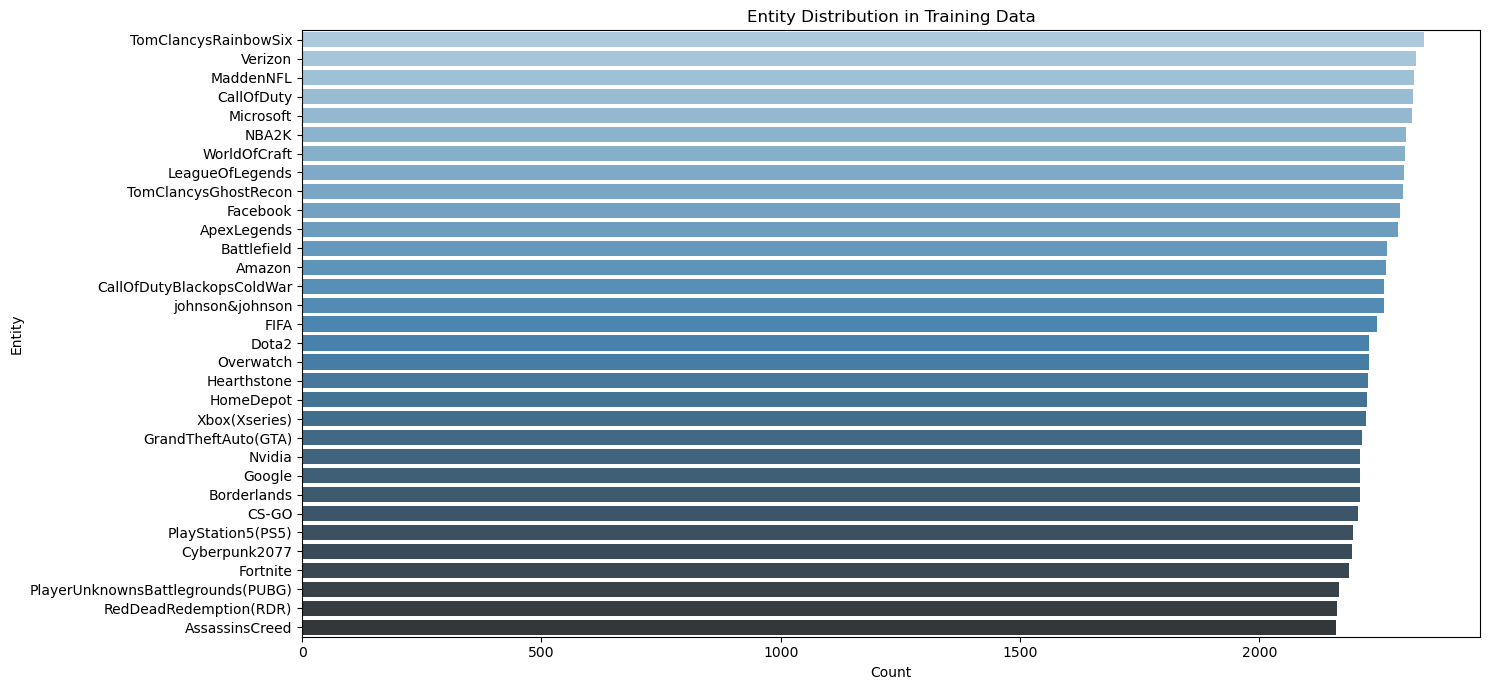

In [12]:
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='Blues_d')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [13]:
# Calculate the length of each message
train_data_cleaned[train_data_cleaned.columns[3]] = train_data_cleaned[train_data_cleaned.columns[3]].fillna('')
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(lambda x: len(str(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_5424\1879181352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned[train_data_cleaned.columns[3]] = train_data_cleaned[train_data_cleaned.columns[3]].fillna('')
C:\Users\Admin\AppData\Local\Temp\ipykernel_5424\1879181352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(lambda x: len(str(x)))


In [14]:
import warnings
warnings.simplefilter(action='ignore',category= FutureWarning)

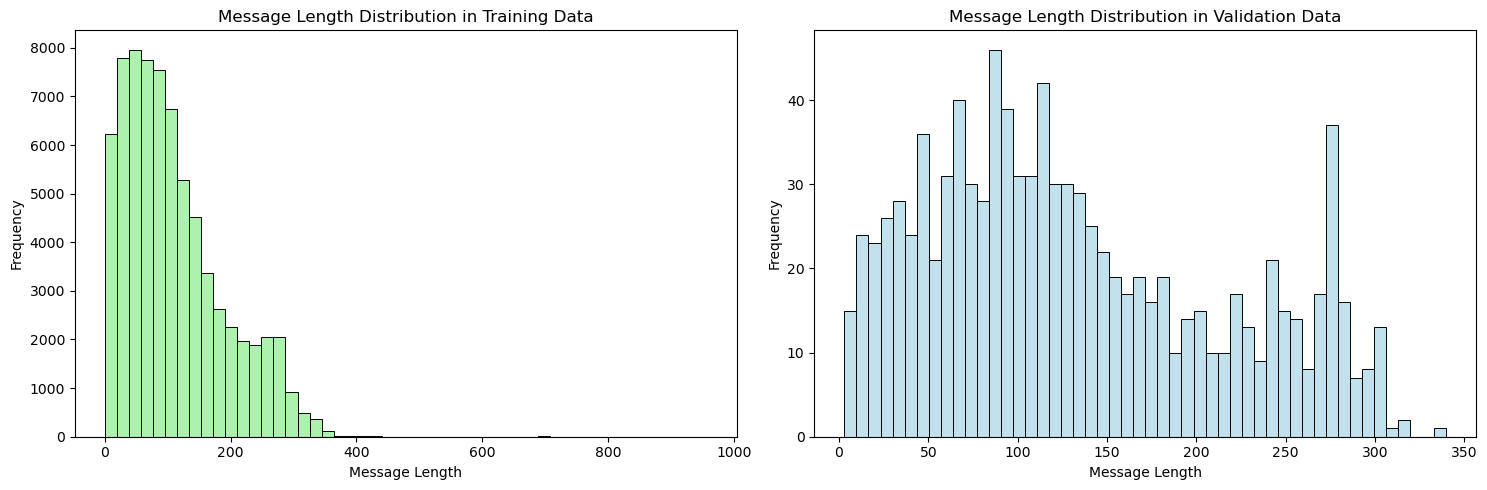

In [15]:

# Calculate the message length for validation data and create a new column
validation_data['message_length'] = validation_data[validation_data.columns[3]].apply(len)

# Create a new figure and axis for plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color="lightgreen")
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(validation_data['message_length'], bins=50, ax=ax[1], color='lightblue')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

# Display the plot
plt.tight_layout()
plt.show()


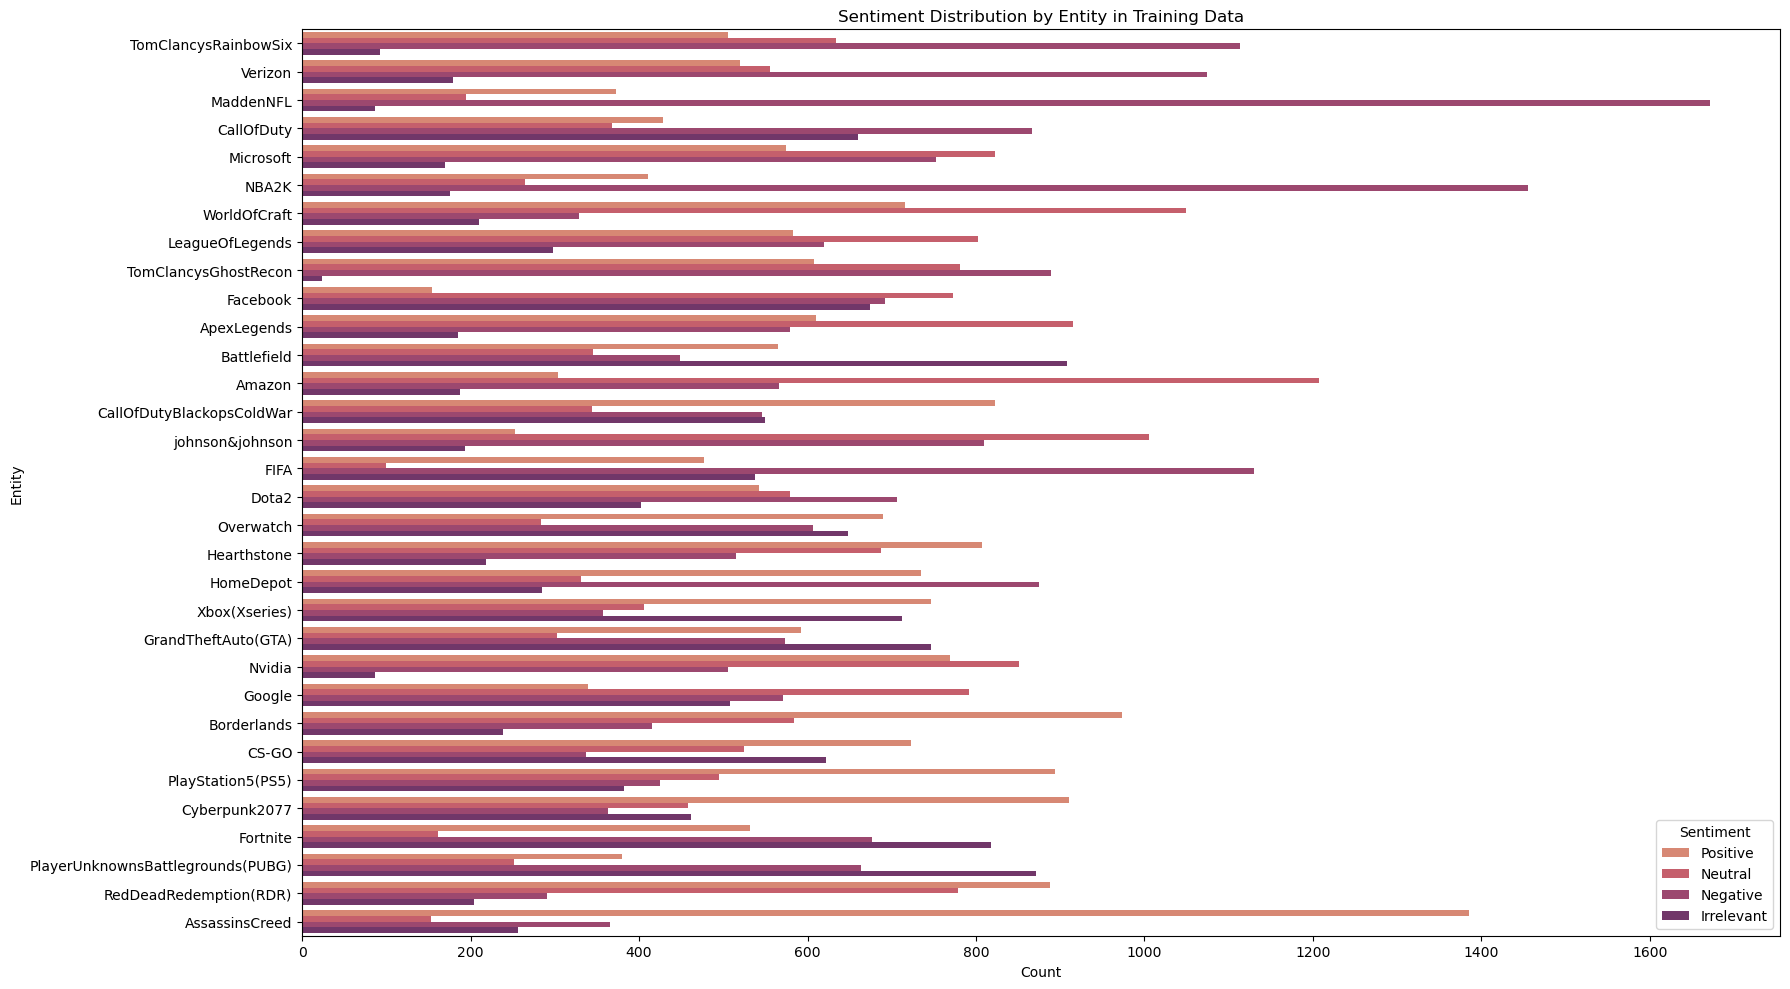

In [16]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], hue=train_data_cleaned.columns[2], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette="flare")
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()